In [1]:
from fastai.vision.all import *

In [38]:
bears = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [39]:
path = Path('images')
dls = bears.dataloaders(path, bs=4)

In [40]:
len(dls.train.items)

48

In [41]:
len(dls.valid.items)

11

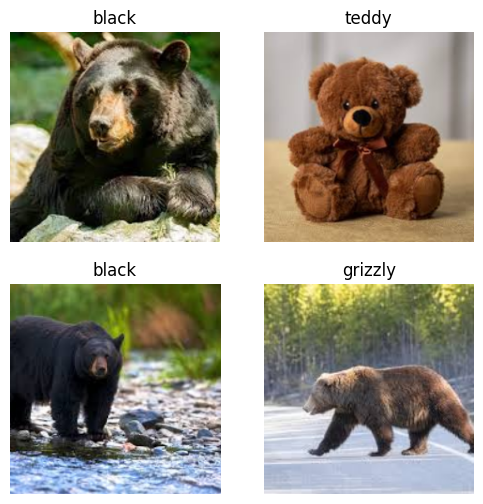

In [45]:
dls.valid.show_batch(max_n=10, nrows=2)

In [46]:
learn = vision_learner(dls, resnet18, metrics=[accuracy, error_rate])

SuggestedLRs(valley=0.001737800776027143)

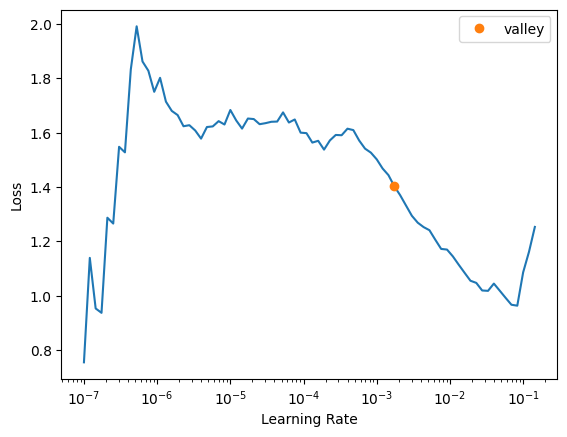

In [47]:
learn.lr_find()

In [48]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.128811,0.194019,0.909091,0.090909,00:02


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.264172,0.177799,0.909091,0.090909,00:04
1,0.243318,0.176885,0.909091,0.090909,00:05
2,0.390464,0.230414,0.909091,0.090909,00:05
3,0.490886,0.211511,0.909091,0.090909,00:06


In [79]:
learn.save('bear_clf')

Path('models/bear_clf.pth')

In [ ]:
learn.export('bear_clf.pkl')

In [82]:
learn.predict('images/teddy/teddy1.jpg')

('teddy', tensor(2), tensor([1.5581e-05, 1.7103e-04, 9.9981e-01]))

In [83]:
learn.predict('images/grizzly/grizzly1.jpg')

('grizzly', tensor(1), tensor([7.7930e-04, 9.9907e-01, 1.5279e-04]))

In [5]:
def search_images_ddg(key,max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass



In [ ]:
ims = search_images_ddg('grizzly bear')

TensorCategory(1)


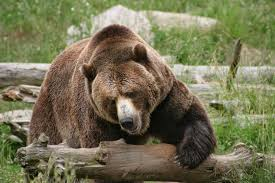

----
TensorCategory(0)


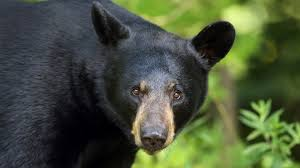

----
TensorCategory(0)


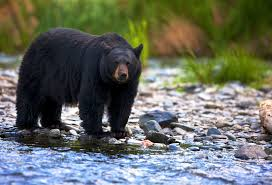

----
TensorCategory(1)


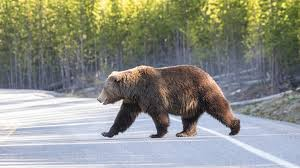

----
TensorCategory(2)


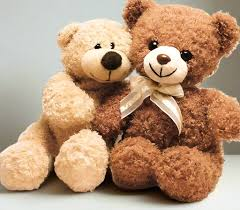

----


In [32]:
for image, cat in dls.valid_ds:
    print(cat)
    display(image)
    print('----')

In [49]:
for img, cat in dls.valid:
    print(img.shape, cat)

torch.Size([4, 3, 224, 224]) TensorCategory([0, 2, 0, 1])
torch.Size([4, 3, 224, 224]) TensorCategory([2, 1, 1, 0])
torch.Size([3, 3, 224, 224]) TensorCategory([1, 1, 0])
